In [33]:
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram

min pixel value:  72
max pixel value:  707


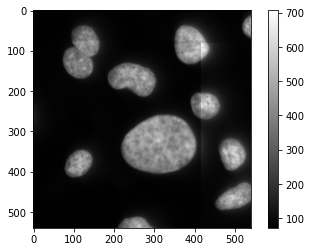

In [34]:
nuc = skio.imread("data/telomeres/C2-condition_1_crop.tif", plugin="tifffile")
plt.imshow(nuc, cmap='gray')
plt.colorbar()
print('min pixel value: ', nuc.min())
print('max pixel value: ', nuc.max())

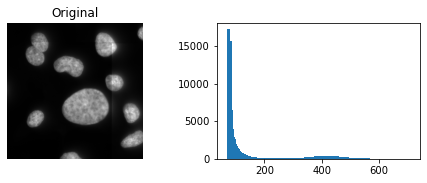

In [35]:

pix_counts, pix_vals = histogram(nuc)

fig, axes = plt.subplots(ncols=2,figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(nuc, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].bar(pix_vals, pix_counts, width = 10)
plt.show()

can we make the segmentation better? how do we account for uneven illumination, noise, stitching errors, etc. the answer is filtering

In [12]:
from skimage.filters import gaussian, threshold_otsu

Lets use a simple gaussian filter

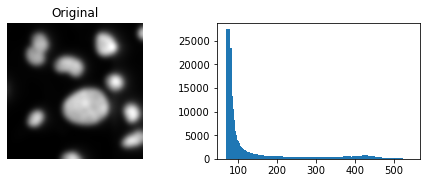

In [40]:
nuc_g = gaussian(nuc,sigma=10,preserve_range=True)
pix_counts, pix_vals = histogram(nuc_g)

fig, axes = plt.subplots(ncols=2,figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(nuc_g, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].bar(pix_vals, pix_counts, width = 10)
plt.show()

is it really better?

The value is:  250
The value after gaussian filter is:  234.75268121837937


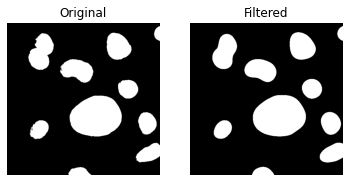

In [41]:
th_val = threshold_otsu(nuc)
print('The value is: ', th_val)
bw_otsu = nuc > th_val

th_val = threshold_otsu(nuc_g)
print('The value after gaussian filter is: ', th_val)
bw_g_otsu = nuc_g > th_val

fig, axes = plt.subplots(ncols=2)
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(bw_otsu, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(bw_g_otsu, cmap=plt.cm.gray)
ax[1].set_title('Filtered')
ax[1].axis('off')
plt.show()

Now lets go a bit into quantification

In [42]:
import pandas as pd
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border

a very important concept is that of image labelling or connected component analysis

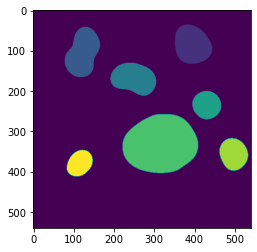

In [43]:
lbl = label(clear_border(bw_g_otsu) )
plt.imshow(lbl)

Now we can calculate properties, bot in terms of morphology and intensities

array([[<AxesSubplot:title={'center':'area'}>]], dtype=object)

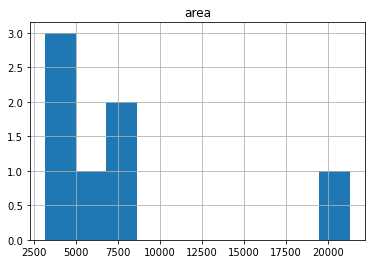

In [44]:
properties = ['label', 'area','eccentricity','intensity_mean']
table = regionprops_table(label_image=lbl, intensity_image=nuc, properties=properties)
#tables = [pd.DataFrame(table) for table in tables]
table = pd.DataFrame(table)
pd.DataFrame(table).head() 
table.hist(column='area')